#Netflix EDA and Trend Analysis
This project is about analysing and visualizing the data of Netflix and then analysing the content trends to understand audience preferences according to these analysed data.

Requirements: Data cleaning, EDA, trend analysis
#1. Data Cleaning
Steps:
- Data overview
- Handling the missing values
- Removing/dropping duplicates




In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [137]:
data=pd.read_csv("netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [138]:
data.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [139]:
data.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [140]:
#check the shape of data
num_rows, num_columns = data.shape

print("Shape of the data:")

print(f"Number of columns: {num_columns}")

print(f"Number of rows: {num_rows}\n")

Shape of the data:
Number of columns: 12
Number of rows: 8807



In [141]:
#show some statistics about this dataset
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [142]:
data.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [143]:
#show the columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [144]:
#describe the dtypes and dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Column date_added's datatype is object, but it should be Datetime.

In [145]:
#checking missing values
print(data.isnull().sum().sort_values(ascending= False))

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64


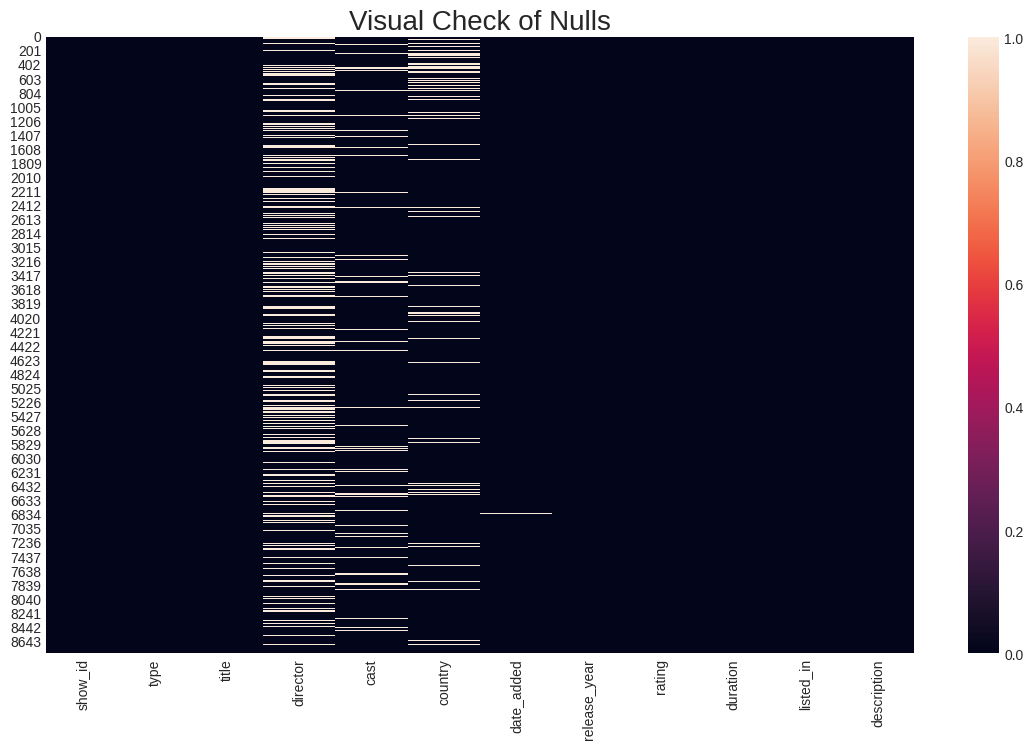

In [146]:
#visualizing the nulls
plt.figure(figsize=(14,8))
sns.heatmap(data.isnull())
plt.title('Visual Check of Nulls',fontsize=20)
plt.show()

In [147]:
#checking the percentage of the missing values
print(data.isna().sum()/data.shape[0]*100)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


We see that, Director has 29.9%, Cast has 9.36%, Country has 9.43%, Date_added has 0.11%, Rating has 0.04% and Duration has 0.03% missing columns.

In [148]:
#checking duplicates
print(data.duplicated().sum())

0


In [149]:
#data transformation of Date_added column
data["date_added"] = pd.to_datetime(data["date_added"], format='mixed')

In [150]:
data["date_added"]

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


In [151]:
#extract the year and month
data["year_added"] = data["date_added"].dt.year
data["month_added"] = data["date_added"].dt.month

print(data[['date_added', 'year_added', 'month_added']])

     date_added  year_added  month_added
0    2021-09-25      2021.0          9.0
1    2021-09-24      2021.0          9.0
2    2021-09-24      2021.0          9.0
3    2021-09-24      2021.0          9.0
4    2021-09-24      2021.0          9.0
...         ...         ...          ...
8802 2019-11-20      2019.0         11.0
8803 2019-07-01      2019.0          7.0
8804 2019-11-01      2019.0         11.0
8805 2020-01-11      2020.0          1.0
8806 2019-03-02      2019.0          3.0

[8807 rows x 3 columns]


In [152]:
data.isna().sum().sort_values(ascending=False)

,0
director,2634
country,831
cast,825
date_added,10
year_added,10
month_added,10
rating,4
duration,3
show_id,0
type,0


In [153]:
#filling the missing values
data.director.fillna(value='Unknown', inplace=True)
data.director

<ipython-input-153-d6e41d94d217>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.director.fillna(value='Unknown', inplace=True)


,director
0,Kirsten Johnson
1,Unknown
2,Julien Leclercq
3,Unknown
4,Unknown
...,...
8802,David Fincher
8803,Unknown
8804,Ruben Fleischer
8805,Peter Hewitt


In [154]:
data.cast.fillna(value='Unknown', inplace=True)
data.cast

<ipython-input-154-35d77665517d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.cast.fillna(value='Unknown', inplace=True)


,cast
0,Unknown
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Unknown
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,Unknown
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [155]:
data.country.fillna(value='Unknown', inplace=True)
data.country

<ipython-input-155-167d26fcc0b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.country.fillna(value='Unknown', inplace=True)


,country
0,United States
1,South Africa
2,Unknown
3,Unknown
4,India
...,...
8802,United States
8803,Unknown
8804,United States
8805,United States


In [156]:
data.date_added.fillna(value='Unknown', inplace=True)
data.date_added

<ipython-input-156-0d3a18a734ec>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.date_added.fillna(value='Unknown', inplace=True)


,date_added
0,2021-09-25 00:00:00
1,2021-09-24 00:00:00
2,2021-09-24 00:00:00
3,2021-09-24 00:00:00
4,2021-09-24 00:00:00
...,...
8802,2019-11-20 00:00:00
8803,2019-07-01 00:00:00
8804,2019-11-01 00:00:00
8805,2020-01-11 00:00:00


In [157]:
data.fillna({'Rating':'Unknown' ,'duration':'Unknown'},inplace=True)

In [158]:
data.dropna(inplace=True)

In [159]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [160]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0


In [161]:
data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
2528,s2529,TV Show,Strangers from Hell,Unknown,"Lee Dong-wook, Im Si-wan, Lee Jung-eun, Lee Hy...",South Korea,2020-05-15 00:00:00,2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Ho...",Unpleasant events disturb the life of an aspir...,2020.0,5.0


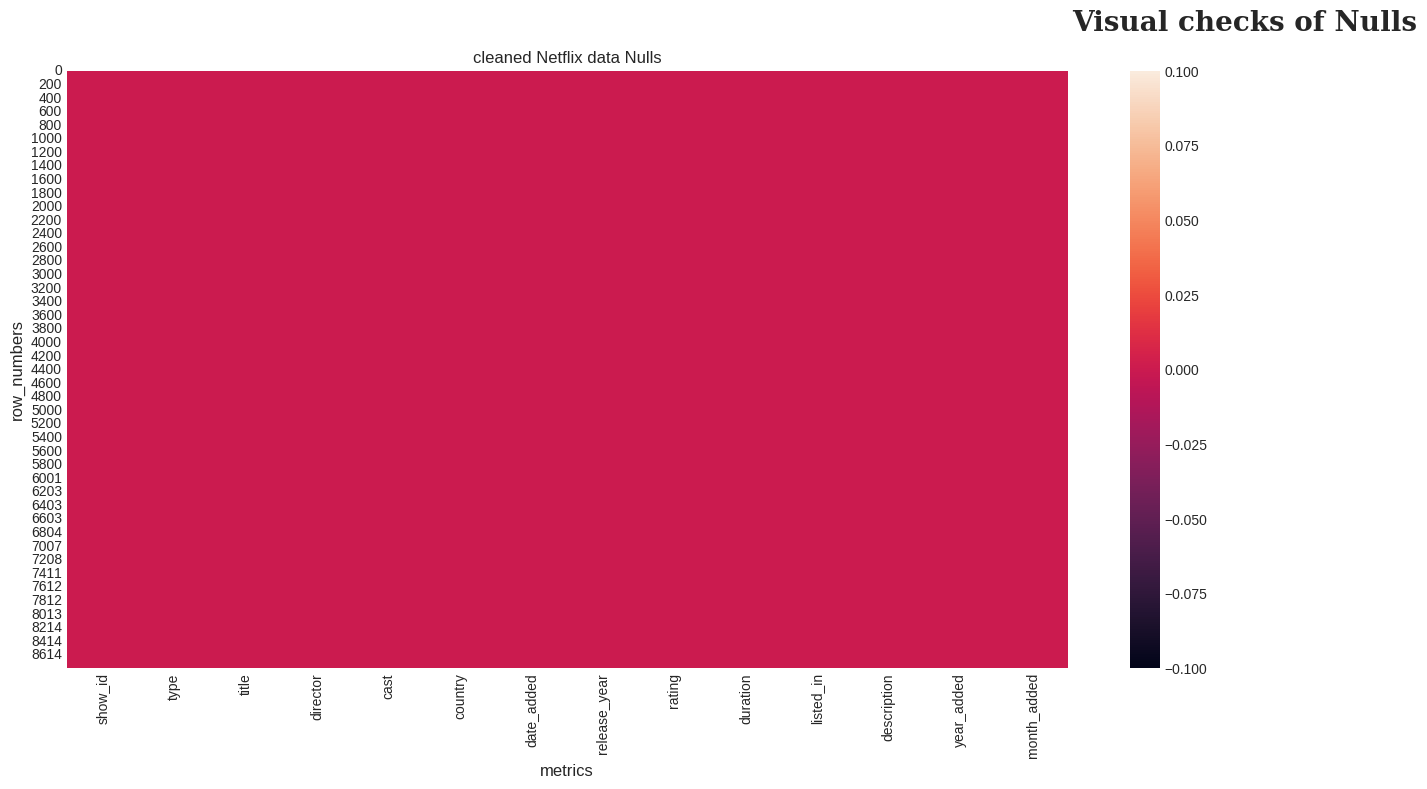

In [162]:
plt.figure(figsize=(25,8), layout='tight').suptitle('Visual checks of Nulls',fontsize=20,fontweight="bold",fontfamily='serif')

plt.subplot(1,2,1)
sns.heatmap(data.isnull())
plt.title('cleaned Netflix data Nulls',fontsize=12)
plt.xlabel('metrics',fontsize=12)
plt.ylabel('row_numbers',fontsize=12)

plt.show()

#2. EDA (Explanatory Data Analysis)

- How are contents distributed in Netflix?

In [163]:
#Content Type Distribution
type_counts = data["type"].value_counts()
type_counts

,count
type,
Movie,6129
TV Show,2664


<ipython-input-164-bad7356fa654>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette=("Reds_r"))


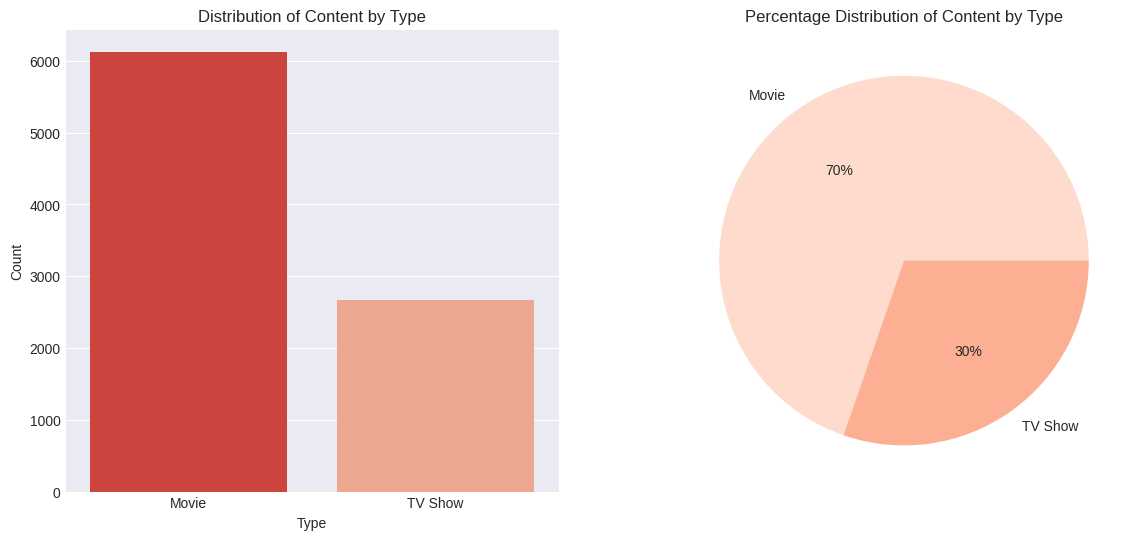

In [164]:
#Plotting distributions
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=type_counts.index, y=type_counts.values, palette=("Reds_r"))
plt.title("Distribution of Content by Type")
plt.xlabel('Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', colors=sns.color_palette("Reds"))
plt.title('Percentage Distribution of Content by Type')
plt.show()

- What are the outliers?

<ipython-input-165-a2dedb9d0047>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data, x='type',y='release_year',palette=['red','salmon'])


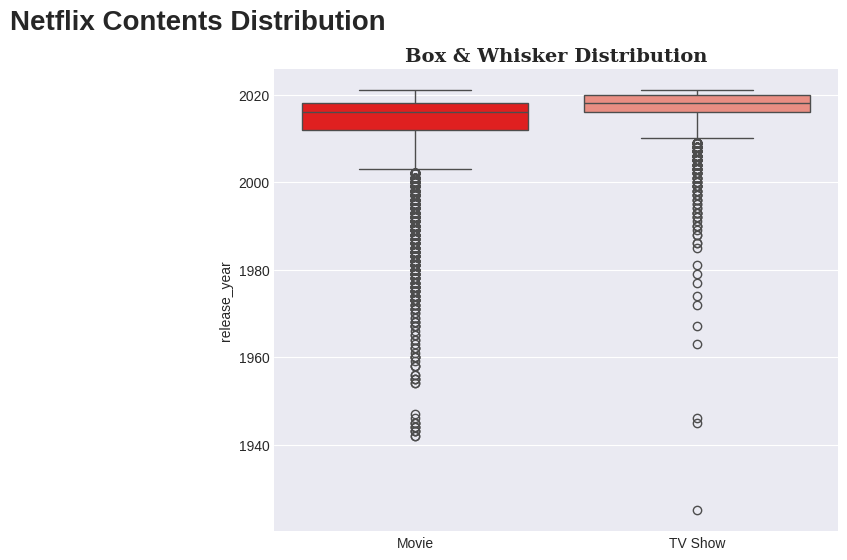

In [165]:
plt.figure(figsize=(16,6))
font = {'weight':'bold',
        'family':'serif'}
plt.suptitle("Netflix Contents Distribution",fontweight='bold',fontsize=20)

plt.style.use('seaborn-v0_8-bright')

plt.subplot(1,2,2)
sns.boxplot(data, x='type',y='release_year',palette=['red','salmon'])
sns.despine()
plt.xlabel('')
plt.title("Box & Whisker Distribution",fontdict=font,fontsize=14)

plt.show()

- How is the rating frequency distrisbution?

<ipython-input-166-2f2ccb8a5ee7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='count', data= rating_freq, palette=("Reds_r"))


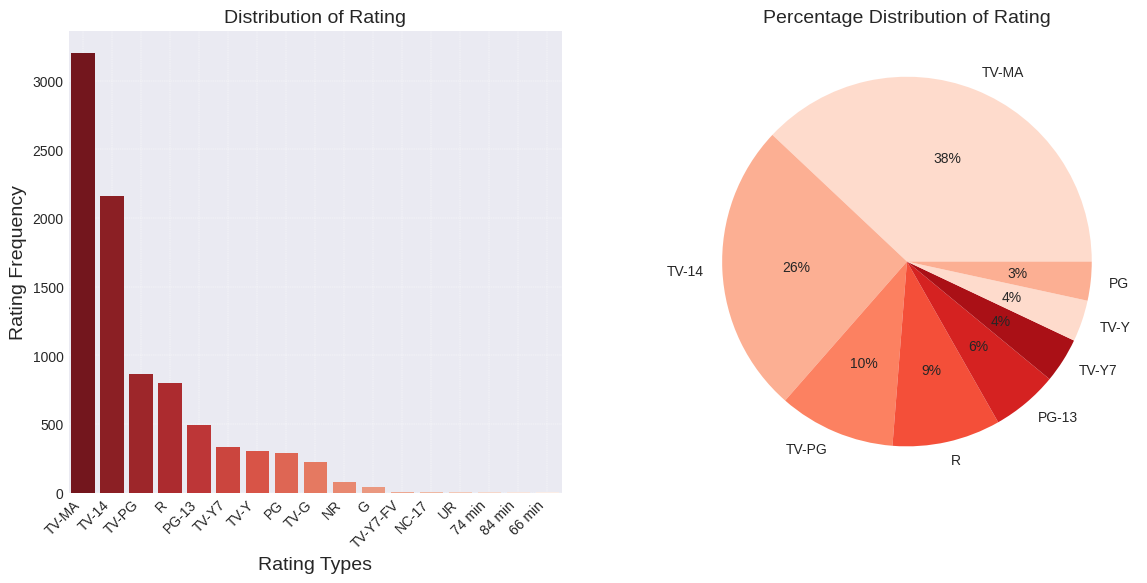

In [166]:
#Rating Frequency
rating_freq = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x='rating', y='count', data= rating_freq, palette=("Reds_r"))
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types", fontsize=14)
plt.ylabel("Rating Frequency", fontsize=14)
plt.title('Distribution of Rating', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.subplot(1,2,2)
plt.pie(rating_freq['count'][:8], labels= rating_freq['rating'][:8], autopct='%.0f%%', colors= sns.color_palette("Reds"))
plt.title('Percentage Distribution of Rating', fontsize=14)
plt.show()

- What are the top 10 Countries which has the most contents?

<ipython-input-167-3f5bf0e3a98b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='count', data=top_ten_countries, palette='Reds_r')


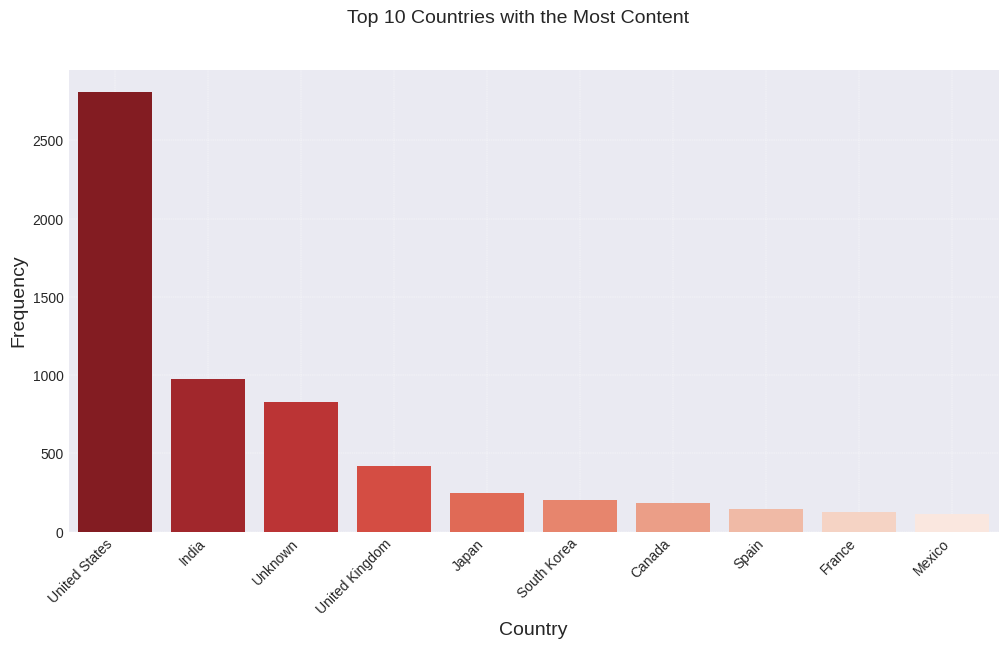

In [167]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=top_ten_countries, palette='Reds_r')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.suptitle("Top 10 Countries with the Most Content", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()

- What are the top 10 popular content genres?

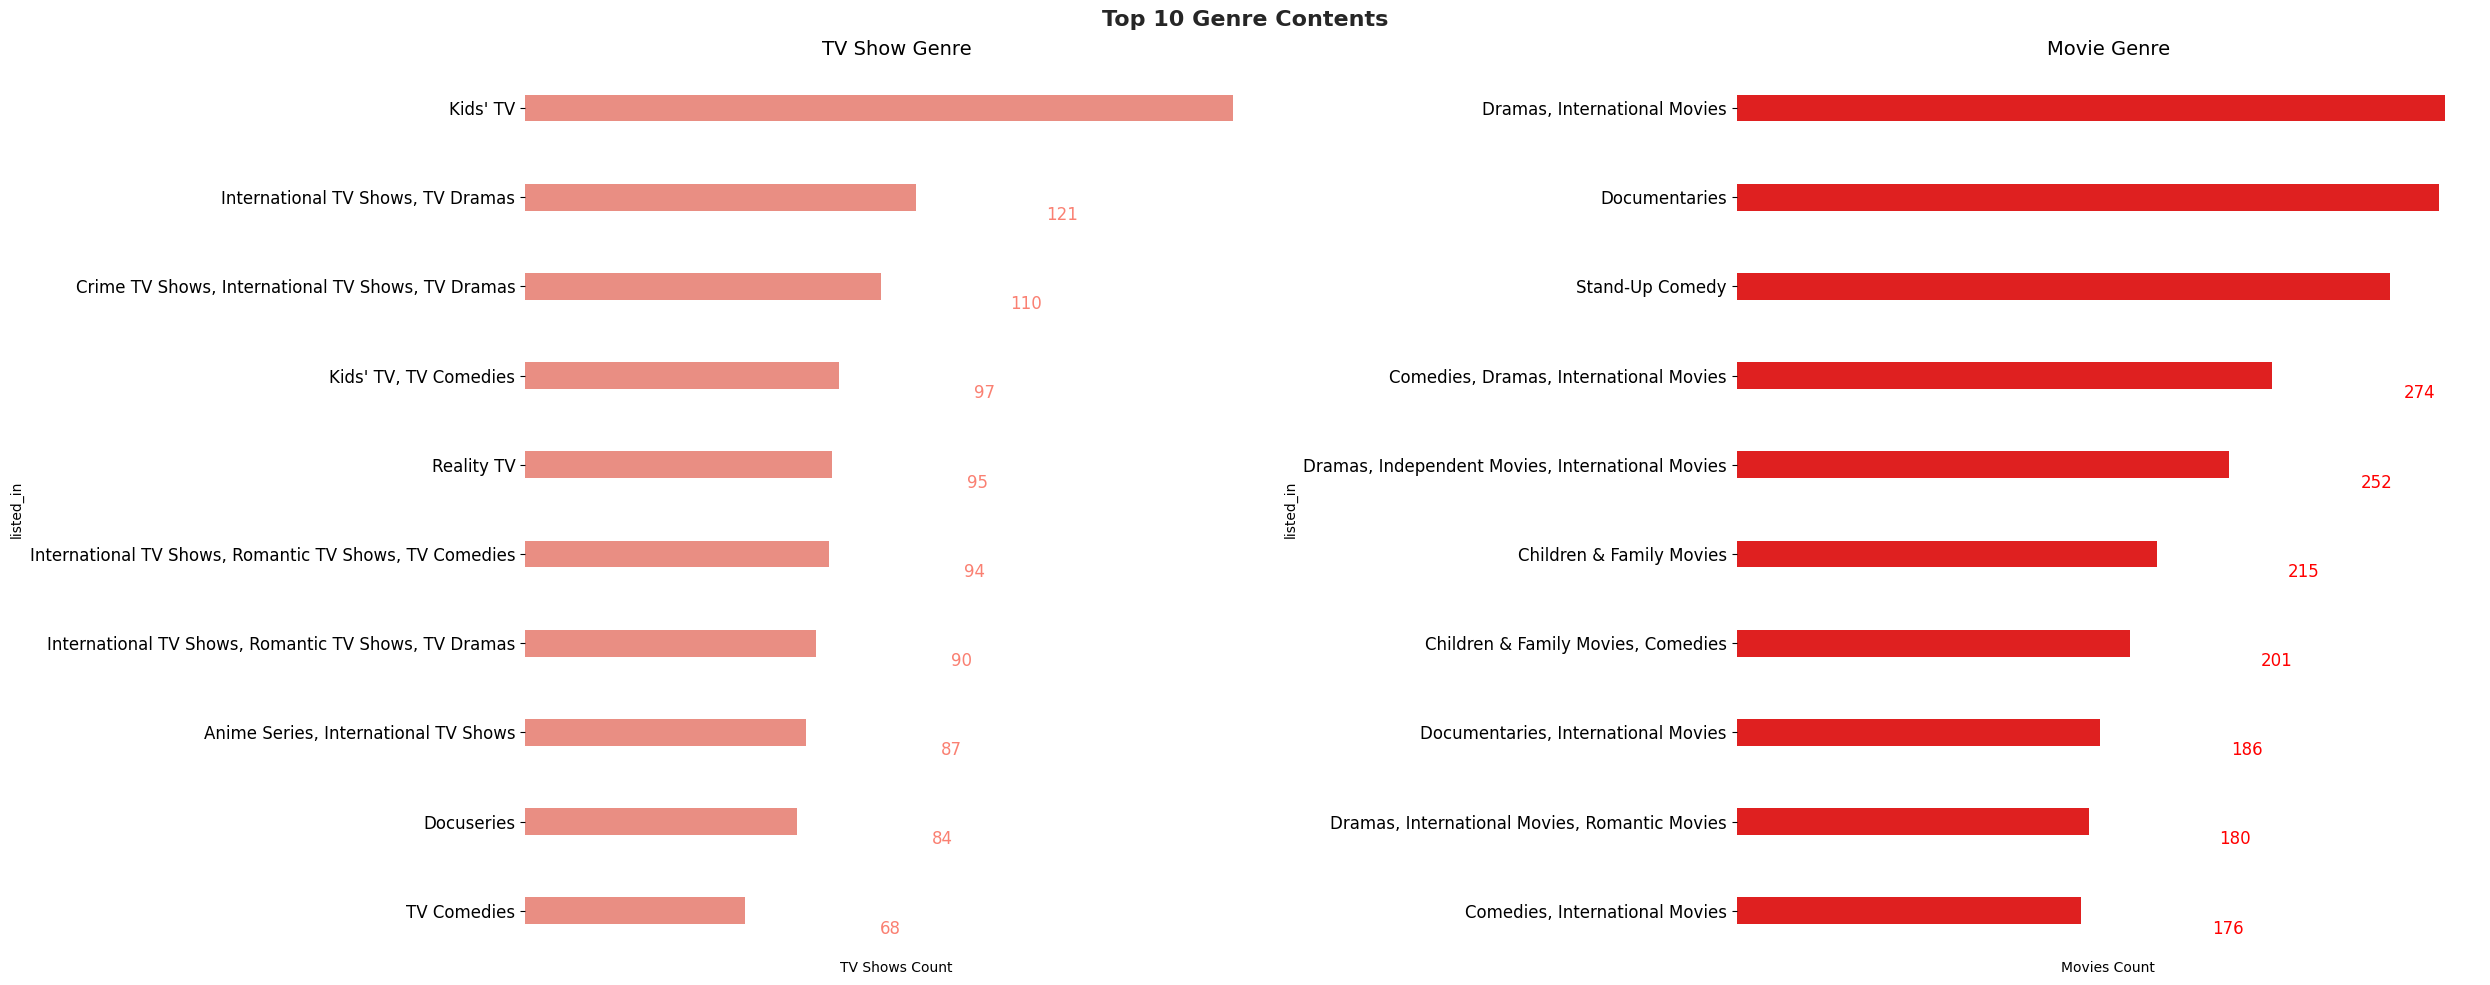

In [168]:
movie_genres=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
series_genres=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(25,10))
plt.suptitle('Top 10 Genre Contents',fontsize=16,
             fontweight="bold",fontfamily='cursive')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')


plt.subplot(1,2,2)
sns.barplot(y=movie_genres.index, x=movie_genres.values, color='red', width=0.3)
sns.despine(left=True, bottom=True, trim=True)
plt.title('Movie Genre', fontsize=14)
plt.xlabel('Movies Count')
plt.xticks([])
plt.yticks(fontsize=12)

for i in range(len(movie_genres)):
    plt.annotate(movie_genres.values[i], (movie_genres.values[i] + 75, i+0.3),
                 ha='center', va='bottom', color='r',fontsize=12)


plt.subplot(1,2,1)
sns.barplot(y=series_genres.index, x=series_genres.values, color='salmon', width=0.3)
sns.despine(left=True, bottom=True, trim=True)
plt.title('TV Show Genre', fontsize=14)
plt.xlabel('TV Shows Count')
plt.xticks([])
plt.yticks(fontsize=12)

for i in range(len(series_genres)):
    plt.annotate(series_genres.values[i], (series_genres.values[i] + 45, i+0.3),
                 ha='center', va='bottom', color='salmon',fontsize=12)

plt.subplots_adjust(left=0.3, right=0.93)  # Sol tarafı genişlet
plt.tight_layout()
plt.show()


- Word Cloud of Genres

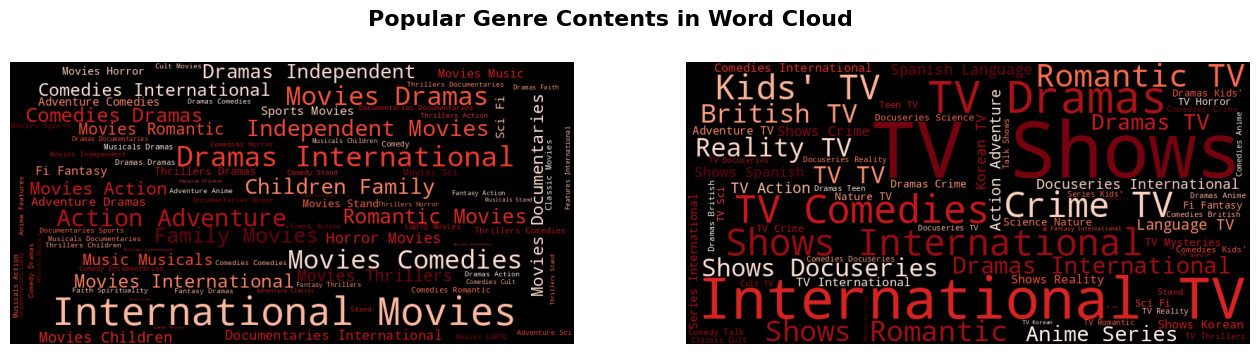

In [169]:
movie_genres = data[data['type'] == 'Movie']['listed_in']
series_genres = data[data['type'] == 'TV Show']['listed_in']

plt.figure(figsize=(16,4))
plt.suptitle('Popular Genre Contents in Word Cloud',
             fontsize = 16,fontweight="bold",fontfamily='fantasy')
plt.style.use('default')
plt.style.use('dark_background')

plt.subplot(1,2,1)
movie_genres_wc =  WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(movie_genres))
plt.imshow(movie_genres_wc)
plt.axis('off')
plt.title("Movie Genre",fontsize=14,fontweight='bold',fontfamily='serif')

plt.subplot(1,2,2)
series_genres_wc =  WordCloud(width=800, height=400, background_color='black', colormap='Reds_r').generate(' '.join(series_genres))
plt.imshow(series_genres_wc)
plt.axis('off')
plt.title("TV Shows Genre",fontsize=14,fontweight='bold',fontfamily='serif')


plt.show()

- How much contents get released every month?

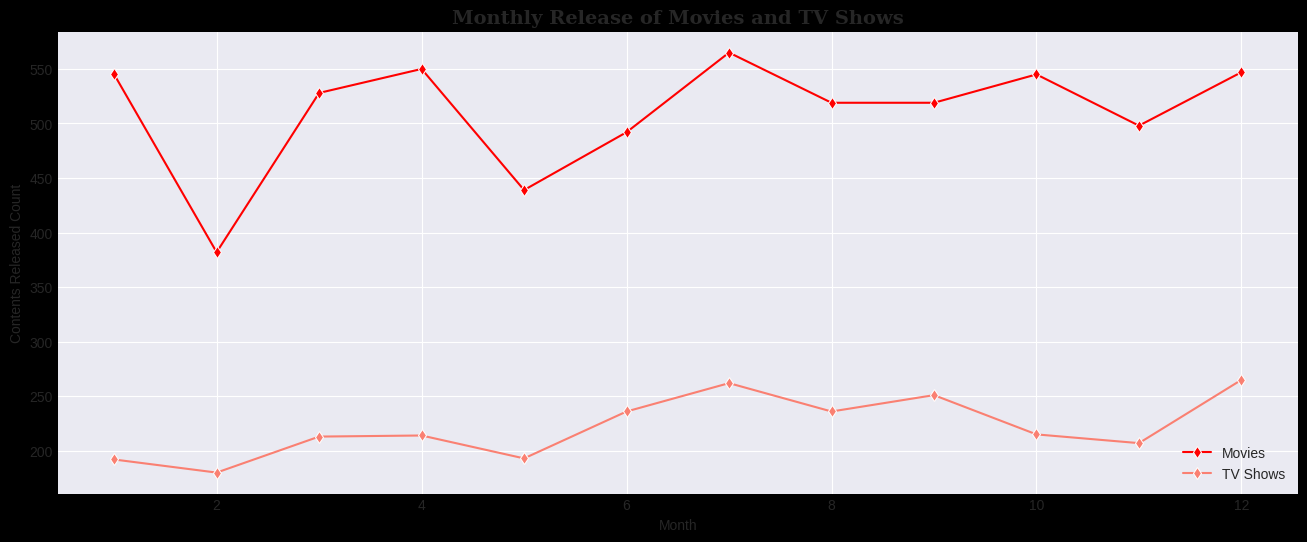

In [170]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn-v0_8-darkgrid')

sns.lineplot(data.groupby(['month_added', 'type']).size().unstack()['Movie'],
             color='r', label='Movies', marker='d')

sns.lineplot(data.groupby(['month_added', 'type']).size().unstack()['TV Show'],
             color='salmon', label='TV Shows', marker='d')

plt.title('Monthly Release of Movies and TV Shows', fontsize=14, fontweight="bold", fontfamily='serif')

plt.xlabel('Month')
plt.ylabel('Contents Released Count')

plt.legend(loc='lower right')

plt.show()

- How much contents get released every year?

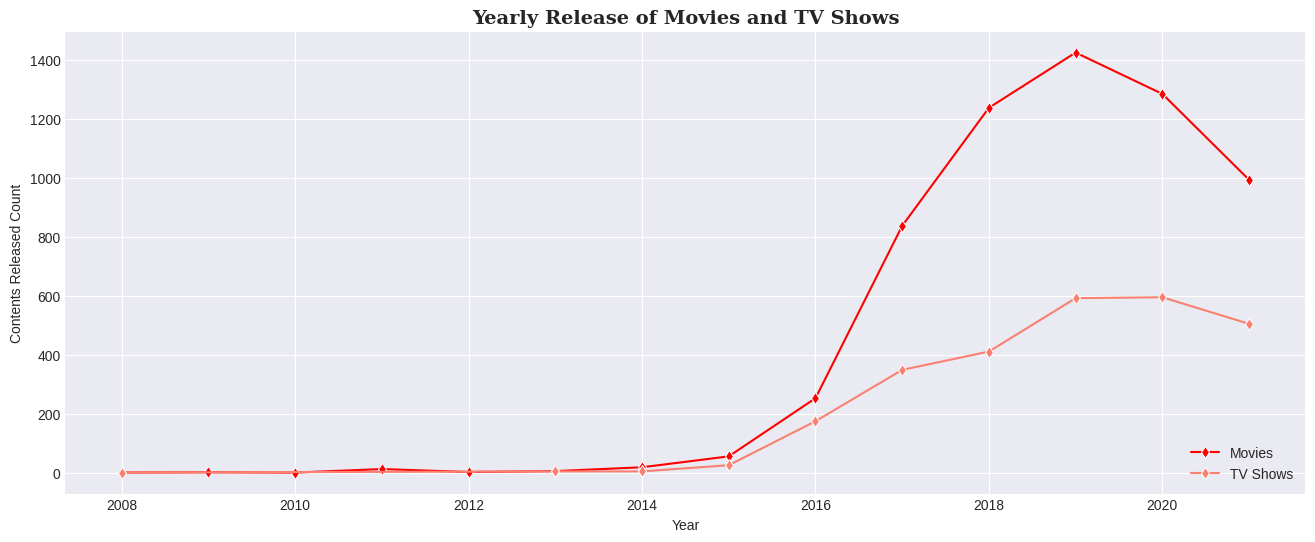

In [171]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn-v0_8-darkgrid')

sns.lineplot(data.groupby(['year_added', 'type']).size().unstack()['Movie'],
             color='r', label='Movies', marker='d')

sns.lineplot(data.groupby(['year_added', 'type']).size().unstack()['TV Show'],
             color='salmon', label='TV Shows', marker='d')

plt.title('Yearly Release of Movies and TV Shows', fontsize=14, fontweight="bold", fontfamily='serif')

plt.xlabel('Year')
plt.ylabel('Contents Released Count')

plt.legend(loc='lower right')

plt.show()

- Distribution and Effects of Film Durations

In [172]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')


In [173]:
print(data['duration'].dtype)

object


<ipython-input-187-03a367d2ccc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genres["duration"] = movie_genres["duration"].str.extract(r'(\d+)').astype(float)


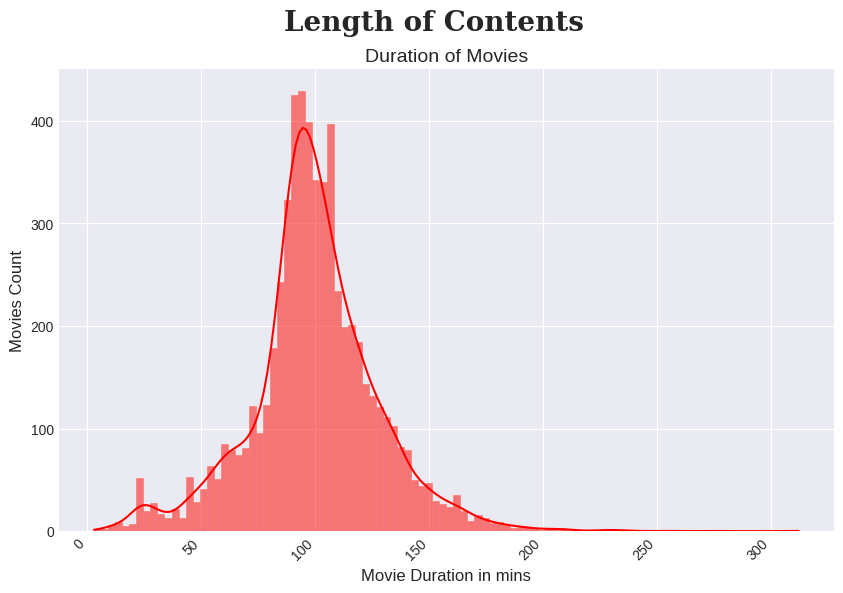

In [187]:
movie_genres = data[data['type'] == 'Movie']
movie_genres["duration"] = movie_genres["duration"].str.extract(r'(\d+)').astype(float)
#movie_genres["duration"].fillna(0.0, inplace=True)
movie_genres_duration = movie_genres['duration'].fillna(movie_genres["duration"].median(),)

plt.figure(figsize=(10,6))
plt.suptitle('Length of Contents',
             fontsize=20,fontweight="bold",fontfamily='serif')
plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')

sns.histplot(x=movie_genres_duration, bins=100, kde=True, color='red', edgecolor='salmon')
plt.xlabel("Movie Duration in mins", fontsize=12)
plt.ylabel("Movies Count", fontsize=12)
plt.title("Duration of Movies", fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()